Importing dataset and Model training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df['average_voltage']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')



Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
R^2 Score: 0.97
Number of iterations: 2227


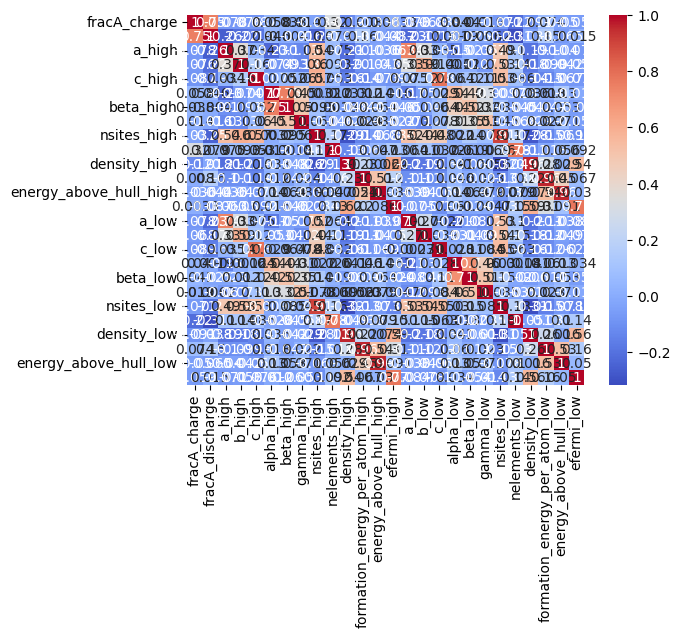

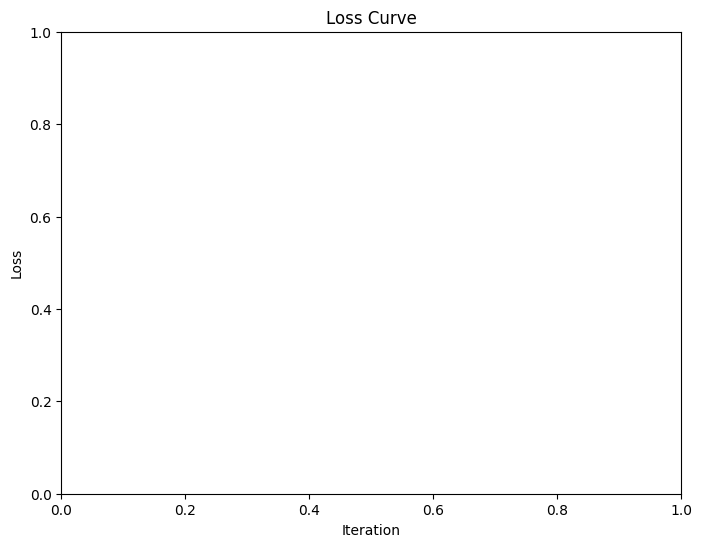

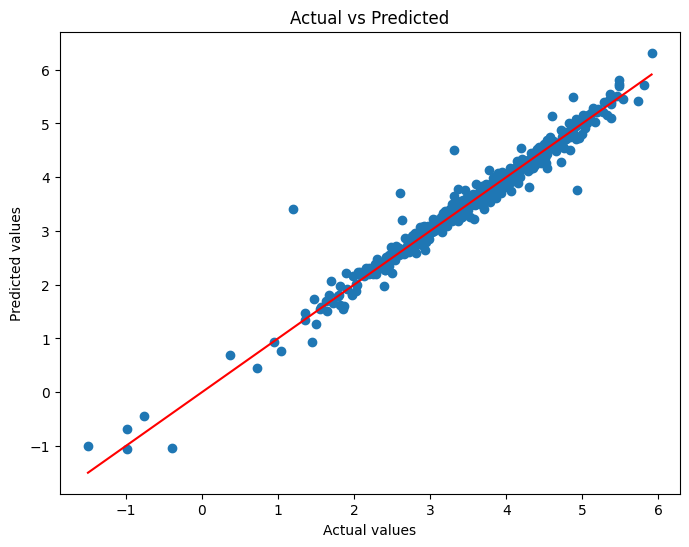

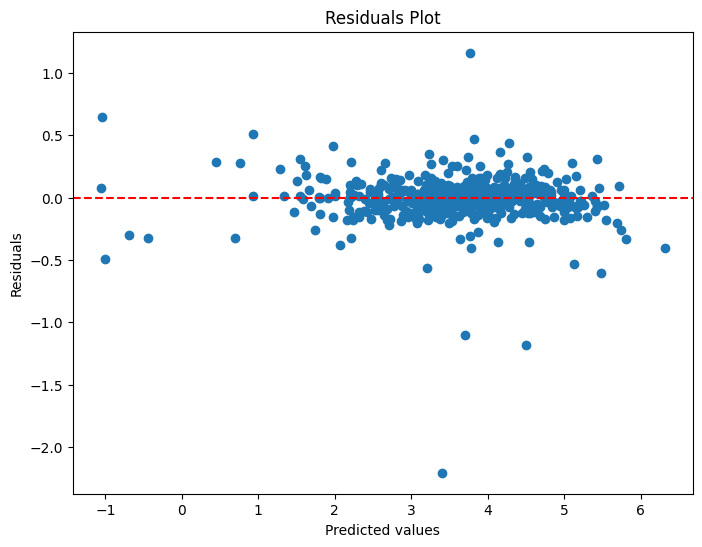

In [ ]:
# correlation heatmap
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# loss curve
plt.figure(figsize=(8, 6))
#plt.plot(model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.show()

# residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # horizontal line at 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [ ]:
# Extracting the coefficients and intercept from the trained MLPRegressor model
coef = model.coefs_
intercept = model.intercepts_

# Flattening the weight matrices and concatenating them with the intercept values
weights = np.concatenate([arr.flatten() for arr in coef])
bias = intercept[-1][0]

# Constructing the regression equation
eqn = 'y = '
for i, w in enumerate(weights):
    eqn += f'({w:.2f} * x{i}) + '
eqn += f'{bias:.2f}'

print('Regression equation:')
print(eqn)


Regression equation:
y = (-0.38 * x0) + (-0.71 * x1) + (-0.61 * x2) + (1.85 * x3) + (1.07 * x4) + (0.54 * x5) + (0.00 * x6) + (1.78 * x7) + (-0.70 * x8) + (1.67 * x9) + (-0.06 * x10) + (1.02 * x11) + (0.60 * x12) + (-2.06 * x13) + (-1.22 * x14) + (0.18 * x15) + (-0.00 * x16) + (-2.06 * x17) + (0.87 * x18) + (-1.81 * x19) + (0.07 * x20) + (0.11 * x21) + (0.09 * x22) + (0.04 * x23) + (0.00 * x24) + (-0.00 * x25) + (-0.04 * x26) + (-0.01 * x27) + (-0.06 * x28) + (-0.03 * x29) + (-0.45 * x30) + (-0.89 * x31) + (-1.06 * x32) + (0.02 * x33) + (-0.04 * x34) + (0.53 * x35) + (0.10 * x36) + (-0.01 * x37) + (0.01 * x38) + (-0.04 * x39) + (-0.40 * x40) + (-0.05 * x41) + (-0.11 * x42) + (-0.02 * x43) + (0.01 * x44) + (0.10 * x45) + (0.02 * x46) + (-0.01 * x47) + (0.02 * x48) + (-0.06 * x49) + (0.02 * x50) + (-0.04 * x51) + (0.04 * x52) + (-0.02 * x53) + (-0.00 * x54) + (-0.02 * x55) + (0.00 * x56) + (-0.07 * x57) + (-0.02 * x58) + (0.02 * x59) + (-0.30 * x60) + (0.07 * x61) + (0.01 * x62) + (0.04 

Plotting Predicted and Actual values over test and train datasets

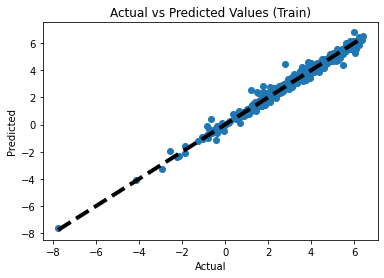

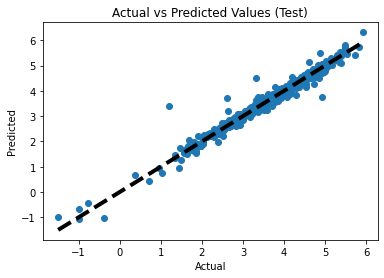

In [ ]:
# Plot actual vs predicted values for train set
train_pred = model.predict(X_train)
plt.scatter(y_train, train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Train)')
plt.show()

# Plot actual vs predicted values for test set
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test)')
plt.show()


In [ ]:
# Define the voltage ranges and their classes
ranges = [(-np.inf, 3.5), (3.5, 4.2), (4.2, np.inf)]
classes = ['Low', 'Medium', 'High']

y_pred_classes = []
for v in y_pred:
    for i, r in enumerate(ranges):
        if v >= r[0] and v < r[1]:
            y_pred_classes.append(classes[i])
            break

# Get actual voltage, predicted voltage and class of 5 values from the test dataset
actual_voltage = y_test[:5]
predicted_voltage = y_pred[:5]
predicted_classes = y_pred_classes[:5]

# Create a Pandas DataFrame to display the values in tabular form
df = pd.DataFrame({'Actual Voltage': actual_voltage,
                   'Predicted Voltage': predicted_voltage,
                   'Class': predicted_classes})

print(df)

      Actual Voltage  Predicted Voltage Class
630         4.146515           4.200824  High
509         4.352588           4.292254  High
2216        1.625750           1.693673   Low
1973        2.551688           2.724493   Low
1602        3.159335           2.975374   Low


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the MLPRegressor model with best hyperparameters
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='adam', alpha=0.01, verbose=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store the metrics
train_loss = []
train_mae_list = []
train_mse_list = []
train_rmse_list = []
train_r2_list = []

test_mae_list = []
test_mse_list = []
test_rmse_list = []
test_r2_list = []

# Train the model for each epoch
for i in range(model.max_iter):
    # Train the model for one epoch
    model.partial_fit(X_train, y_train)

    # Compute the training loss
    train_loss.append(model.loss_)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Evaluate the performance of the model on the training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store the training metrics
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)

    # Evaluate the performance of the model on the testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the testing metrics
    test_mae_list.append(test_mae)
    test_mse_list.append(test_mse)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)

    # Print the performance metrics on both train and test sets
    #print(f"Epoch {i}: Train MAE={train_mae:.4f}, Train MSE={train_mse:.4f}, Train RMSE={train_rmse:.4f}, Train R2={train_r2:.4f}; Test MAE={test_mae:.4f}, Test MSE={test_mse:.4f}, Test RMSE={test_rmse:.4f}, Test R2=={test_r2:.4f}")

    # Store the metrics for train set
    train_y_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    train_r2 = r2_score(y_train, train_y_pred)
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

#Plot MAE versus epochs for train and test sets
plt.plot(test_mae_list, label='Test')
plt.plot(train_mae_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot MSE versus epochs for train and test sets
plt.plot(test_mse_list, label='Test')
plt.plot(train_mse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot RMSE versus epochs for train and test sets
plt.plot(test_rmse_list, label='Test')
plt.plot(train_rmse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot R2 score versus epochs for train and test sets
plt.plot(test_r2_list, label='Test')
plt.plot(train_r2_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()
plt.xlim([0, 4000])
plt.show()


NameError: ignored

Streaming output truncated to the last 5000 lines.
Iteration 1501, loss = 0.02518547
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1502, loss = 0.02515079
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1503, loss = 0.02514219
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1504, loss = 0.02513400
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1505, loss = 0.02511477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1506, loss = 0.02510336
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1507, loss = 0.02506636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1508, loss = 0.02506564
Training loss did not improve more than tol=0.0

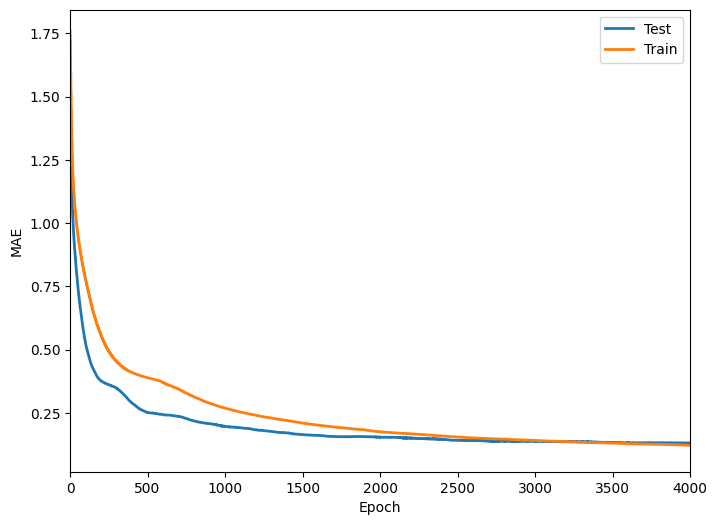

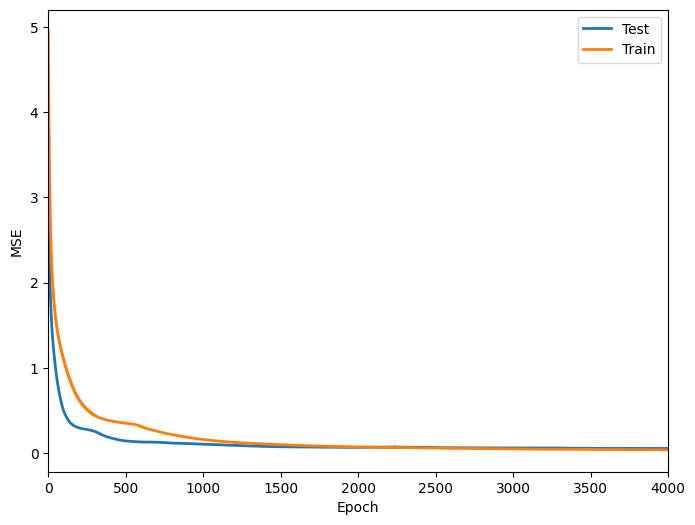

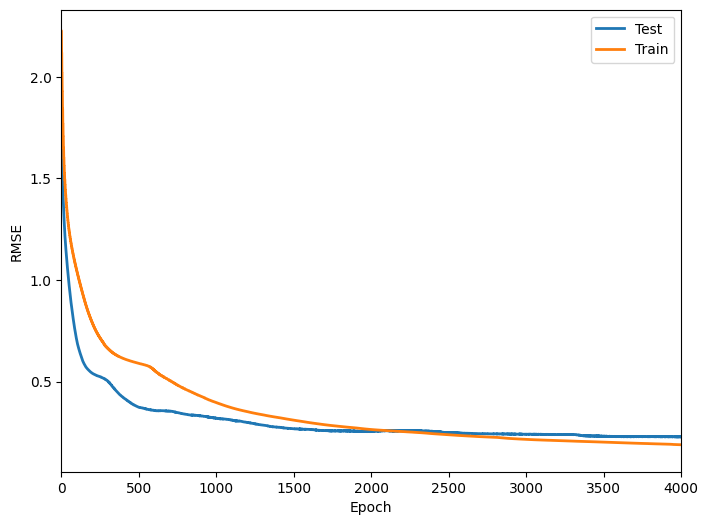

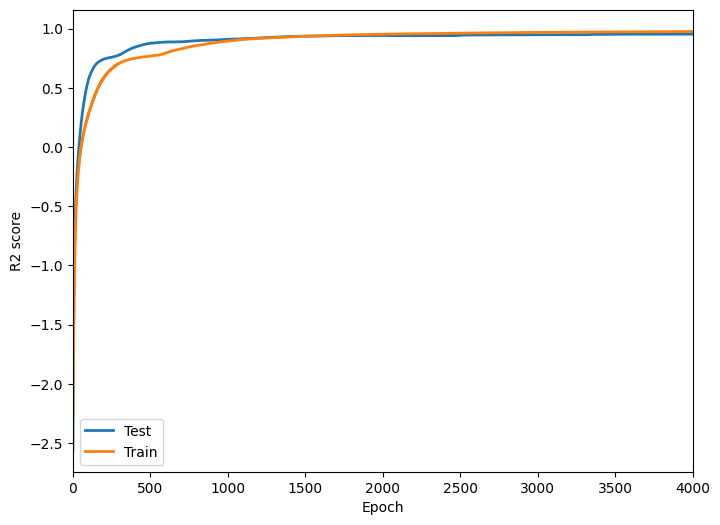

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Set global params
plt.rcParams['font.size'] = 10 # Set the font size
plt.rcParams['lines.linewidth'] = 2 # Set the line width

# Define the MLPRegressor model with best hyperparameters
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='adam', alpha=0.01, verbose=True)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store the metrics
train_loss = []
train_mae_list = []
train_mse_list = []
train_rmse_list = []
train_r2_list = []

test_mae_list = []
test_mse_list = []
test_rmse_list = []
test_r2_list = []

# Train the model for each epoch
for i in range(model.max_iter):
    # Train the model for one epoch
    model.partial_fit(X_train, y_train)

    # Compute the training loss
    train_loss.append(model.loss_)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Evaluate the performance of the model on the training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store the training metrics
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)

    # Evaluate the performance of the model on the testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the testing metrics
    test_mae_list.append(test_mae)
    test_mse_list.append(test_mse)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)

    # Print the performance metrics on both train and test sets
    #print(f"Epoch {i}: Train MAE={train_mae:.4f}, Train MSE={train_mse:.4f}, Train RMSE={train_rmse:.4f}, Train R2={train_r2:.4f}; Test MAE={test_mae:.4f}, Test MSE={test_mse:.4f}, Test RMSE={test_rmse:.4f}, Test R2=={test_r2:.4f}")

    # Store the metrics for train set
    train_y_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    train_r2 = r2_score(y_train, train_y_pred)
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

#Plot MAE versus epochs for train and test sets
plt.figure(figsize=(8,6)) # Increase the figure size
plt.plot(test_mae_list, label='Test')
plt.plot(train_mae_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("MAE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot MSE versus epochs for train and test sets
plt.figure(figsize=(8,6))
plt.plot(test_mse_list, label='Test')
plt.plot(train_mse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("MSE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot RMSE versus epochs for train and test sets
plt.figure(figsize=(8,6))
plt.plot(test_rmse_list, label='Test')
plt.plot(train_rmse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("RMSE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot R2 score versus epochs for train and test sets
plt.figure(figsize=(8,6))
plt.plot(test_r2_list, label='Test')
plt.plot(train_r2_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("R2_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()


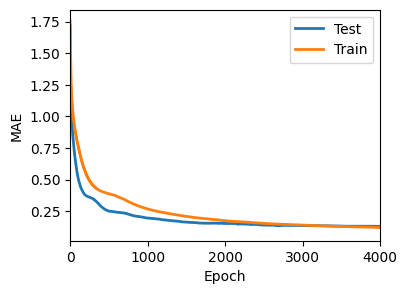

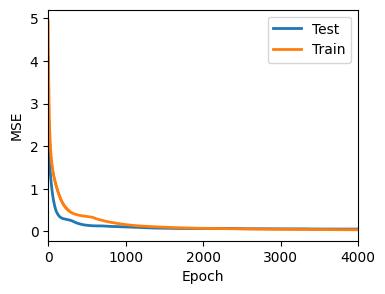

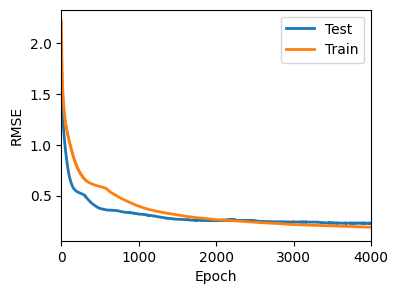

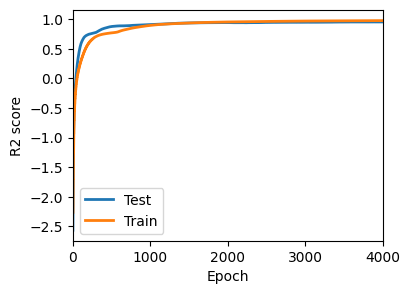

In [ ]:
#Plot MAE versus epochs for train and test sets
plt.figure(figsize=(4,3)) # Increase the figure size
plt.plot(test_mae_list, label='Test')
plt.plot(train_mae_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("MAE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot MSE versus epochs for train and test sets
plt.figure(figsize=(4,3))
plt.plot(test_mse_list, label='Test')
plt.plot(train_mse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("MSE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot RMSE versus epochs for train and test sets
plt.figure(figsize=(4,3))
plt.plot(test_rmse_list, label='Test')
plt.plot(train_rmse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("RMSE_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

#Plot R2 score versus epochs for train and test sets
plt.figure(figsize=(4,3))
plt.plot(test_r2_list, label='Test')
plt.plot(train_r2_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()
plt.xlim([0, 4000])
plt.savefig("R2_vs_epochs.png", dpi=300) # Save the figure with higher resolution
plt.show()

In [ ]:
# Save the data points for each plot in separate CSV files
np.savetxt('mae_train.csv', train_mae_list, delimiter=',')
np.savetxt('mae_test.csv', test_mae_list, delimiter=',')

np.savetxt('mse_train.csv', train_mse_list, delimiter=',')
np.savetxt('mse_test.csv', test_mse_list, delimiter=',')

np.savetxt('rmse_train.csv', train_rmse_list, delimiter=',')
np.savetxt('rmse_test.csv', test_rmse_list, delimiter=',')

np.savetxt('r2_train.csv', train_r2_list, delimiter=',')
np.savetxt('r2_test.csv', test_r2_list, delimiter=',')


Capacity and Voltage Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y_voltage = df['average_voltage']
y_capacity = df['capacity_grav']

# Splitting the data into training and testing sets for voltage
X_train_voltage, X_test_voltage, y_train_voltage, y_test_voltage = train_test_split(X, y_voltage, test_size=0.2, random_state=42)

# Standardizing the input features for voltage
scaler_voltage = StandardScaler()
X_train_voltage = scaler_voltage.fit_transform(X_train_voltage)
X_test_voltage = scaler_voltage.transform(X_test_voltage)

# Defining the MLPRegressor model with best hyperparameters and early stopping for voltage
model_voltage = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the voltage model
model_voltage.fit(X_train_voltage, y_train_voltage)

# Making predictions on the testing data for voltage
y_pred_voltage = model_voltage.predict(X_test_voltage)

# Evaluating the performance of the voltage model
mae_voltage = mean_absolute_error(y_test_voltage, y_pred_voltage)
mse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage)
rmse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage, squared=False)
r2_voltage = r2_score(y_test_voltage, y_pred_voltage)

print(f'Average Voltage Model:')
print(f'Mean Absolute Error: {mae_voltage:.2f}')
print(f'Mean Squared Error: {mse_voltage:.2f}')
print(f'Root Mean Squared Error: {rmse_voltage:.2f}')
print(f'R^2 Score: {r2_voltage:.2f}')

print(f'Number of iterations: {model_voltage.n_iter_}')

# Splitting the data into training and testing sets for capacity
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=42)

# Standardizing the input features for capacity
scaler_capacity = StandardScaler()
X_train_capacity = scaler_capacity.fit_transform(X_train_capacity)
X_test_capacity = scaler_capacity.transform(X_test_capacity)

# Defining the MLPRegressor model with best hyperparameters and early stopping for capacity
model_capacity = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

#Training the model for capacity
model_capacity.fit(X_train, y_train_capacity)

#Making predictions on the testing data for capacity
y_pred_capacity = model_capacity.predict(X_test)

#Evaluating the performance of the model for capacity
mae_capacity = mean_absolute_error(y_test_capacity, y_pred_capacity)
mse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity)
rmse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)
r2_capacity = r2_score(y_test_capacity, y_pred_capacity)

print(f'Mean Absolute Error for capacity: {mae_capacity:.2f}')
print(f'Mean Squared Error for capacity: {mse_capacity:.2f}')
print(f'Root Mean Squared Error for capacity: {rmse_capacity:.2f}')
print(f'R^2 Score for capacity: {r2_capacity:.2f}')

print(f'Number of iterations for capacity: {model_capacity.n_iter_}')


Average Voltage Model:
Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
R^2 Score: 0.97
Number of iterations: 2227


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')

# Selecting the input features and target variables
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y_voltage = df['average_voltage']
y_capacity = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y_train_voltage, y_test_voltage, y_train_capacity, y_test_capacity = train_test_split(X, y_voltage, y_capacity, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Defining the MLPRegressor model with best hyperparameters and early stopping for voltage
model_voltage = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model for voltage
model_voltage.fit(X_train, y_train_voltage)

# Making predictions on the testing data for voltage
y_pred_voltage = model_voltage.predict(X_test)

# Evaluating the performance of the model for voltage
mae_voltage = mean_absolute_error(y_test_voltage, y_pred_voltage)
mse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage)
rmse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage, squared=False)
r2_voltage = r2_score(y_test_voltage, y_pred_voltage)

print(f'Mean Absolute Error for voltage: {mae_voltage:.2f}')
print(f'Mean Squared Error for voltage: {mse_voltage:.2f}')
print(f'Root Mean Squared Error for voltage: {rmse_voltage:.2f}')
print(f'R^2 Score for voltage: {r2_voltage:.2f}')

print(f'Number of iterations for voltage: {model_voltage.n_iter_}')

# Defining the MLPRegressor model with best hyperparameters and early stopping for capacity
model_capacity = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model for capacity
model_capacity.fit(X_train, y_train_capacity)

# Making predictions on the testing data for capacity
y_pred_capacity = model_capacity.predict(X_test)

#Evaluating the performance of the capacity model
mae_capacity = mean_absolute_error(y_test_capacity, y_pred_capacity)
mse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity)
rmse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)
r2_capacity = r2_score(y_test_capacity, y_pred_capacity)

print(f'Mean Absolute Error for capacity: {mae_capacity:.2f}')
print(f'Mean Squared Error for capacity: {mse_capacity:.2f}')
print(f'Root Mean Squared Error for capacity: {rmse_capacity:.2f}')
print(f'R^2 Score for capacity: {r2_capacity:.2f}')

print(f'Number of iterations for capacity: {model_capacity.n_iter_}')

Mean Absolute Error for voltage: 0.11
Mean Squared Error for voltage: 0.04
Root Mean Squared Error for voltage: 0.20
R^2 Score for voltage: 0.97
Number of iterations for voltage: 2227
Mean Absolute Error for capacity: 10.97
Mean Squared Error for capacity: 632.87
Root Mean Squared Error for capacity: 25.16
R^2 Score for capacity: 0.86
Number of iterations for capacity: 3571


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')

# Selecting the input features and target variables
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y_voltage = df['average_voltage']
y_capacity = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y_train_capacity, y_test_capacity, y_train_voltage, y_test_voltage = train_test_split(X, y_capacity, y_voltage, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.01, 0.001, 0.0001],
    'max_iter': [2000, 3000, 4000],
    'solver': ['adam', 'lbfgs'],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [10, 20],
}

# Performing GridSearchCV for capacity
grid_capacity = GridSearchCV(estimator=MLPRegressor(random_state=42, activation='relu'), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_capacity.fit(X_train, y_train_capacity)

# Printing the best hyperparameters for capacity
print(f"Best Hyperparameters for Capacity Prediction: {grid_capacity.best_params_}")

# Training the model for capacity with best hyperparameters
model_capacity = grid_capacity.best_estimator_
model_capacity.fit(X_train, y_train_capacity)

# Making predictions on the testing data for capacity
y_pred_capacity = model_capacity.predict(X_test)

#Evaluating the performance of the capacity model
mae_capacity = mean_absolute_error(y_test_capacity, y_pred_capacity)
mse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity)
rmse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)
r2_capacity = r2_score(y_test_capacity, y_pred_capacity)

print(f'Mean Absolute Error for capacity: {mae_capacity:.2f}')
print(f'Mean Squared Error for capacity: {mse_capacity:.2f}')
print(f'Root Mean Squared Error for capacity: {rmse_capacity:.2f}')
print(f'R^2 Score for capacity: {r2_capacity:.2f}')

print(f'Number of iterations for capacity: {model_capacity.n_iter_}')

# Defining the MLPRegressor model with best hyperparameters for voltage prediction

param_grid_voltage = {
'hidden_layer_sizes': [(10,), (50,), (100,)],
'alpha': [0.01, 0.001, 0.0001],
'max_iter': [2000, 3000, 4000],
'solver': ['adam', 'lbfgs'],
'early_stopping': [True],
'validation_fraction': [0.1, 0.2],
'n_iter_no_change': [10, 20],
}

#Performing GridSearchCV for voltage
grid_voltage = GridSearchCV(estimator=MLPRegressor(random_state=42, activation='relu'), param_grid=param_grid_voltage, cv=3, n_jobs=-1, verbose=2)
grid_voltage.fit(X_train, y_train_voltage)

#Printing the best hyperparameters for voltage
print(f"Best Hyperparameters for Voltage Prediction: {grid_voltage.best_params_}")

#Training the model for voltage with best hyperparameters
model_voltage = grid_voltage.best_estimator_
model_voltage.fit(X_train, y_train_voltage)

#Making predictions on the testing data for voltage
y_pred_voltage = model_voltage.predict(X_test)

#Evaluating the performance of the voltage model
mae_voltage = mean_absolute_error(y_test_voltage, y_pred_voltage)
mse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage)
rmse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage, squared=False)
r2_voltage = r2_score(y_test_voltage, y_pred_voltage)

print(f'Mean Absolute Error for voltage: {mae_voltage:.2f}')
print(f'Mean Squared Error for voltage: {mse_voltage:.2f}')
print(f'Root Mean Squared Error for voltage: {rmse_voltage:.2f}')
print(f'R^2 Score for voltage: {r2_voltage:.2f}')

print(f'Number of iterations for voltage: {model_voltage.n_iter_}')

#Defining the MLPRegressor model with best hyperparameters for capacity and voltage
model = MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=4000, solver='adam', early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, random_state=42, activation='relu')

#Training the model with both capacity and voltage as target variables
model.fit(X_train, {'capacity_grav': y_train_capacity, 'average_voltage': y_train_voltage})

#Making predictions on the testing data for capacity and voltage
y_pred_capacity, y_pred_voltage = model.predict(X_test)['capacity_grav'], model.predict(X_test)['average_voltage']

#Evaluating the performance of the model
mae_capacity_voltage = mean_absolute_error(y_test_capacity, y_pred_capacity)
mae_voltage_voltage = mean_absolute_error(y_test_voltage, y_pred_voltage)
mse_capacity_voltage = mean_squared_error(y_test_capacity, y_pred_capacity)
mse_voltage_voltage = mean_squared_error(y_test_voltage, y_pred_voltage)
rmse_capacity_voltage = mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)
rmse_voltage_voltage = mean_squared_error(y_test_voltage, y_pred_voltage, squared=False)
r2_capacity_voltage = r2_score(y_test_capacity, y_pred_capacity)
r2_voltage_voltage = r2_score(y_test_voltage, y_pred_voltage)

print(f'Mean Absolute Error for capacity: {mae_capacity_voltage:.2f}')
print(f'Mean Absolute Error for voltage: {mae_voltage_voltage:.2f}')
print(f'Mean Squared Error for capacity: {mse_capacity_voltage:.2f}')
print(f'Mean Squared Error for voltage: {mse_voltage_voltage:.2f}')
print(f'Root Mean Squared Error for voltage: {rmse_voltage:.2f}')
print(f'R^2 Score for voltage: {r2_voltage:.2f}')

print(f'Number of iterations for voltage: {model_voltage.n_iter_}')

#Saving the trained capacity and voltage models using joblib
import joblib

joblib.dump(model_capacity, 'capacity_model.joblib')
joblib.dump(model_voltage, 'voltage_model.joblib')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters for Capacity Prediction: {'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'max_iter': 2000, 'n_iter_no_change': 20, 'solver': 'adam', 'validation_fraction': 0.1}
Mean Absolute Error for capacity: 9.39
Mean Squared Error for capacity: 377.54
Root Mean Squared Error for capacity: 19.43
R^2 Score for capacity: 0.92
Number of iterations for capacity: 650
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters for Voltage Prediction: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'max_iter': 3000, 'n_iter_no_change': 10, 'solver': 'lbfgs', 'validation_fraction': 0.1}
Mean Absolute Error for voltage: 0.11
Mean Squared Error for voltage: 0.04
Root Mean Squared Error for voltage: 0.21
R^2 Score for voltage: 0.96
Number of iterations for voltage: 1749


TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(80,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')



Mean Absolute Error: 8.88
Mean Squared Error: 416.24
Root Mean Squared Error: 20.40
R^2 Score: 0.91
Number of iterations: 4000


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df['average_voltage']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Extracting the coefficients and intercepts
coef = model.coefs_
intercept = model.intercepts_

# Generate the regression equation for each output variable
for i in range(coef.shape[0]):
    equation = f'y_{i+1} = '
    for j in range(coef[i].shape[0]):
        for k in range(coef[i].shape[1]):
            equation += f'({coef[i][j][k]:.2f} * x_{k+1}) + '
    equation = equation[:-3]  # Remove the last '+'
    equation += f'({intercept[i]:.2f})\n'
    print(equation)




# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Regression equation: {equation}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')


AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')

# Convert formula_charge and formula_discharge into BoE representation
#elements = ['Li', 'H', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K']
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
def get_boe(formula):
    boe = np.zeros(len(elements))
    for atom in formula.split():
        element, count = re.match('([A-Z][a-z]*)(\d*)', atom).groups()
        boe[elements.index(element)] += int(count) if count else 1
    return boe

df['boe_charge'] = df['formula_charge'].apply(get_boe)
df['boe_discharge'] = df['formula_discharge'].apply(get_boe)

# Combine the BoE representation with other input features
X = np.hstack([df[['fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high', 'a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']].values, df['boe_charge'].tolist(), df['boe_discharge'].tolist()])

# Define the target variables
y = df[['average_voltage', 'capacity_grav']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

#Extracting the composition features from the formula_charge and formula_discharge columns
df['formula_charge'] = df['formula_charge'].str.replace('\d+', '')
df['formula_discharge'] = df['formula_discharge'].str.replace('\d+', '')
unique_elements = set(','.join(df['formula_charge'].tolist() + df['formula_discharge'].tolist()).split(','))
#unique_elements.remove('')
unique_elements = sorted(list(unique_elements))
df_compositions = pd.DataFrame(columns=unique_elements)
for i in range(len(df)):
  composition_charge = df.iloc[i]['formula_charge']
  composition_discharge = df.iloc[i]['formula_discharge']
  composition_dict = {}
for element in unique_elements:
  composition_dict[element] = 0
for element in composition_charge.split('-'):
  composition_dict[element] += df.iloc[i]['fracA_charge']
for element in composition_discharge.split('-'):
  composition_dict[element] += 1 - df.iloc[i]['fracA_charge']
df_compositions = df_compositions.append(composition_dict, ignore_index=True)

#Concatenating the composition features with the existing input features
X = pd.concat([X, df_compositions], axis=1)




#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Training the model
model.fit(X_train, y_train)

#Making predictions on the testing data
y_pred = model.predict(X_test)

#Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')

<ipython-input-5-d2734113a29c>:44: FutureWarning: The default value of regex will change from True to False in a future version.
  df['formula_charge'] = df['formula_charge'].str.replace('\d+', '')
<ipython-input-5-d2734113a29c>:45: FutureWarning: The default value of regex will change from True to False in a future version.
  df['formula_discharge'] = df['formula_discharge'].str.replace('\d+', '')


TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]

# Extracting the compositions as a numpy array
#elements = ['Li', 'H', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K']
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
df_compositions = np.array([df['formula_charge'].apply(lambda x: x.count(element)) for element in elements]).T

# Convert df_compositions to a DataFrame
df_compositions = pd.DataFrame(df_compositions, columns=elements)

# Concatenating the composition features with the existing input features
X = pd.concat([X, df_compositions], axis=1)

# Extracting the target variables
y = df[['average_voltage', 'capacity_grav']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')


Mean Absolute Error: 4.19
Mean Squared Error: 192.39
Root Mean Squared Error: 10.27
R^2 Score: 0.56
Number of iterations: 4000


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
X

,fracA_charge,fracA_discharge,a_high,b_high,c_high,alpha_high,beta_high,gamma_high,nsites_high,nelements_high,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,0.000000,0.058824,5.242196,5.453920,9.116347,106.677933,89.575963,118.358885,16,3,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.086957,5.293999,6.364493,16.244254,81.261697,80.736981,73.239209,42,3,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.055556,8.576539,8.576539,8.576539,60.159356,60.159356,60.159364,34,3,...,0,0,0,0,0,0,0,0,0,0
3,0.125000,0.222222,4.624683,4.624683,8.347292,90.000000,90.000000,89.999976,16,3,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.055556,8.407705,9.262238,12.818414,90.000000,90.000000,90.000000,68,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,0.000000,0.058824,5.148896,5.249611,7.233076,109.600113,105.565440,98.836358,16,5,...,0,0,0,0,0,0,0,0,0,0
2356,0.000000,0.040000,6.435440,8.302433,8.302170,78.364596,110.671593,110.668516,48,3,...,0,0,0,0,0,0,0,0,0,0
2357,0.000000,0.166667,3.996409,3.996409,3.996409,90.000000,90.000000,90.000000,5,3,...,0,0,0,0,0,0,0,0,0,0
2358,0.214286,0.266667,7.948879,7.948879,9.006165,78.630172,78.630172,28.741099,28,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.7 MB/s eta 0:00:00


In [ ]:
pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from rdkit import Chem
import deepchem as dc

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')

# Extract the SMILES strings from the formula columns
smiles_charge = df['formula_charge']
smiles_discharge = df['formula_discharge']

# Create molecular graphs from the SMILES strings using DeepChem
featurizer = dc.feat.ConvMolFeaturizer()
graphs_charge = featurizer.featurize(smiles_charge)
graphs_discharge = featurizer.featurize(smiles_discharge)

# Convert the molecular graphs to arrays
X_charge = np.array([graph.to_array() for graph in graphs_charge])
X_discharge = np.array([graph.to_array() for graph in graphs_discharge])

# Combine the molecular graph arrays with the other features
X = np.concatenate([df[['fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high', 'a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']], X_charge, X_discharge], axis=1)

# Split the data into training and testing sets
y = df[['average_voltage', 'capacity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the performance of the model
mae_voltage = mean_absolute_error(y_test['average_voltage'], y_pred[:, 0])
mse_voltage = mean_squared_error(y_test['average_voltage'], y_pred[:, 0])
rmse_voltage = mean_squared_error(y_test['average_voltage'], y_pred[:, 0], squared=False)
r2_voltage = r2_score(y_test['average_voltage'], y_pred[:, 0])

mae_capacity = mean_absolute_error(y_test['capacity'], y_pred[:, 1])
mse_capacity = mean_squared_error(y_test['capacity'], y_pred[:, 1])
rmse_capacity = mean_squared_error(y_test['capacity'], y_pred[:, 1], squared=False)
r2_capacity = r2_score(y_test['capacity'], y_pred[:, 1])

#Print the performance metrics
print('Voltage Prediction Metrics:')
print(f'Mean Absolute Error: {mae_voltage:.2f}')
print(f'Mean Squared Error: {mse_voltage:.2f}')
print(f'Root Mean Squared Error: {rmse_voltage:.2f}')
print(f'R^2 Score: {r2_voltage:.2f}\n')

print('Capacity Prediction Metrics:')
print(f'Mean Absolute Error: {mae_capacity:.2f}')
print(f'Mean Squared Error: {mse_capacity:.2f}')
print(f'Root Mean Squared Error: {rmse_capacity:.2f}')
print(f'R^2 Score: {r2_capacity:.2f}\n')

Streaming output truncated to the last 5000 lines.
[11:08:19] SMILES Parse Error: Failed parsing SMILES 'Li2Fe(PO3)5' for input: 'Li2Fe(PO3)5'
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[11:08:19] SMILES Parse Error: syntax error while parsing: LiFe(PO3)4
[11:08:19] SMILES Parse Error: Failed parsing SMILES 'LiFe(PO3)4' for input: 'LiFe(PO3)4'
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[11:08:19] SMILES Parse Error: syntax error while parsing: LiCr(PO4)2
[11:08:19] SMILES Parse Error: Failed parsing SMILES 'LiCr(PO4)2' for input: 'LiCr(PO4)2'
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool break

AttributeError: ignored

In [ ]:
# Convert SMILES strings to molecular graphs
graphs_charge = [Molecule.from_smiles(smi) for smi in df['formula_charge']]
graphs_discharge = [Molecule.from_smiles(smi) for smi in df['formula_discharge']]

# Convert the molecular graphs to arrays
X_charge = np.array([graph.get_adjacency_matrix().todense() for graph in graphs_charge])
X_discharge = np.array([graph.get_adjacency_matrix().todense() for graph in graphs_discharge])

# Combine the molecular graph arrays with the other features
X_combined_charge = np.concatenate((X, X_charge), axis=1)
X_combined_discharge = np.concatenate((X, X_discharge), axis=1)

# Split the data into training and testing sets
X_train_charge, X_test_charge, y_train_charge, y_test_charge = train_test_split(X_combined_charge, y, test_size=0.2, random_state=42)
X_train_discharge, X_test_discharge, y_train_discharge, y_test_discharge = train_test_split(X_combined_discharge, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler_charge = StandardScaler()
X_train_charge = scaler_charge.fit_transform(X_train_charge)
X_test_charge = scaler_charge.transform(X_test_charge)

scaler_discharge = StandardScaler()
X_train_discharge = scaler_discharge.fit_transform(X_train_discharge)
X_test_discharge = scaler_discharge.transform(X_test_discharge)

# Defining the GNN model with best hyperparameters and early stopping
model_charge = GNNRegressor(n_features=X_combined_charge.shape[1], n_targets=2, n_hidden=3, n_filters=32, filter_size=5, lr=0.001, epochs=1000, early_stopping=True, patience=50, verbose=True)
model_discharge = GNNRegressor(n_features=X_combined_discharge.shape[1], n_targets=2, n_hidden=3, n_filters=32, filter_size=5, lr=0.001, epochs=1000, early_stopping=True, patience=50, verbose=True)

# Training the model
model_charge.fit(X_train_charge, y_train_charge)
model_discharge.fit(X_train_discharge, y_train_discharge)

# Making predictions on the testing data
y_pred_charge = model_charge.predict(X_test_charge)
y_pred_discharge = model_discharge.predict(X_test_discharge)

# Evaluating the performance of the model
mae_voltage_charge = mean_absolute_error(y_test_charge['average_voltage'], y_pred_charge[:, 0])
mse_voltage_charge = mean_squared_error(y_test_charge['average_voltage'], y_pred_charge[:, 0])
rmse_voltage_charge = mean_squared_error(y_test_charge['average_voltage'], y_pred_charge[:, 0], squared=False)
r2_voltage_charge = r2_score(y_test_charge['average_voltage'], y_pred_charge[:, 0])

mae_capacity_charge = mean_absolute_error(y_test_charge['capacity'], y_pred_charge[:, 1])
mse_capacity_charge = mean_squared_error(y_test_charge['capacity'], y_pred_charge[:, 1])
rmse_capacity_charge = mean_squared_error(y_test_charge['capacity'], y_pred_charge[:, 1], squared=False)
r2_capacity_charge = r2_score(y_test_charge['capacity'], y_pred_charge[:, 1])

mae_voltage_discharge = mean_absolute_error(y_test_discharge['average_voltage'], y_pred_discharge[:, 0])
mse_voltage_discharge = mean_squared_error(y_test_discharge
['average_voltage'], y_pred_discharge[:, 0])
rmse_voltage_discharge = mean_squared_error(y_test_discharge['average_voltage'], y_pred_discharge[:, 0], squared=False)
r2_voltage_discharge = r2_score(y_test_discharge['average_voltage'], y_pred_discharge[:, 0])

mae_capacity_discharge = mean_absolute_error(y_test_discharge['capacity'], y_pred_discharge[:, 1])
mse_capacity_discharge = mean_squared_error(y_test_discharge['capacity'], y_pred_discharge[:, 1])
rmse_capacity_discharge = mean_squared_error(y_test_discharge['capacity'], y_pred_discharge[:, 1], squared=False)
r2_capacity_discharge = r2_score(y_test_discharge['capacity'], y_pred_discharge[:, 1])

#Print the results
print('Charge')
print('-------')
print(f'MAE - Voltage: {mae_voltage_charge:.3f}')
print(f'MSE - Voltage: {mse_voltage_charge:.3f}')
print(f'RMSE - Voltage: {rmse_voltage_charge:.3f}')
print(f'R2 - Voltage: {r2_voltage_charge:.3f}')
print(f'MAE - Capacity: {mae_capacity_charge:.3f}')
print(f'MSE - Capacity: {mse_capacity_charge:.3f}')
print(f'RMSE - Capacity: {rmse_capacity_charge:.3f}')
print(f'R2 - Capacity: {r2_capacity_charge:.3f}\n')

print('Discharge')
print('----------')
print(f'MAE - Voltage: {mae_voltage_discharge:.3f}')
print(f'MSE - Voltage: {mse_voltage_discharge:.3f}')
print(f'RMSE - Voltage: {rmse_voltage_discharge:.3f}')
print(f'R2 - Voltage: {r2_voltage_discharge:.3f}')
print(f'MAE - Capacity: {mae_capacity_discharge:.3f}')
print(f'MSE - Capacity: {mse_capacity_discharge:.3f}')
print(f'RMSE - Capacity: {rmse_capacity_discharge:.3f}')
print(f'R2 - Capacity: {r2_capacity_discharge:.3f}\n')

NameError: ignored